# Naive Bayes Classifer 

For this challege, we will be building a Navie Bayes classification model to classify whether feedback left on a website is either positive or negative. Our start model will be using data from a [Yelp Review](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#) dataset. 



## Yelp Overview
First, we will explore the data and then select some features to run our inital model. 

In [1]:
# Libraries 

%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
# Import raw data 

yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
yelp_raw.columns = ['review','sentiment']
yelp_raw.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
# Check info 

yelp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
review        1000 non-null object
sentiment     1000 non-null int64
angry         1000 non-null bool
slow          1000 non-null bool
never         1000 non-null bool
poor          1000 non-null bool
bad           1000 non-null bool
horrible      1000 non-null bool
old           1000 non-null bool
bland         1000 non-null bool
overpriced    1000 non-null bool
rude          1000 non-null bool
terrible      1000 non-null bool
dtypes: bool(11), int64(1), object(1)
memory usage: 26.5+ KB


In [4]:
# Check how many datapoints per column 

yelp_raw['sentiment'].value_counts()

1    500
0    500
Name: sentiment, dtype: int64

This dataset contains 1,000 rows and two columns, review text and sentiment scores (1 = positive, 0 = negative). The sentiments scores are split even with 500 obersevations in each class. 

Next, we will construct a set of keywords for negative sentiment. 

In [5]:
# Taking a look at negative reviews

neg_reviews = yelp_raw.loc[yelp_raw['sentiment']== 0]
neg_reviews.head()

,review,sentiment
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


In [6]:
# Create negative keywords 

neg_keywords = ['angry', 'slow', 'never', 'poor',
                'bad', 'horrible', 'old', 'bland', 'overpriced',
               'rude', 'terrible']

for key in neg_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

Before we continue, one main assumption of Naive Bayes is that the variables fed into the model are independent of each other. Let's check to see how true that is by using a correlation maxtrix and a heatmap from seaborn. 

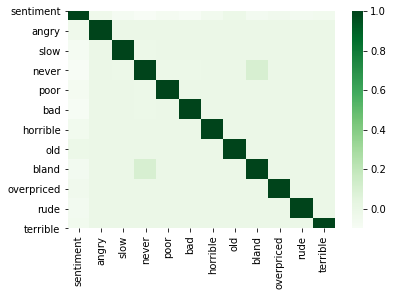

In [7]:
# Create heatmap 

sns.heatmap(yelp_raw.corr(), cmap="Greens")

Since most of the words are not strongly correlated to each other. We will continue by building out our training data with SKLearn. In this step, we will specify an outcome and input variable. 

In [8]:
data = yelp_raw[neg_keywords]
target = yelp_raw['sentiment']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 449


With our initial model, we missed classified 44.9% of the data points. 